In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd = os.getcwd()
print(pwd)

e:\research\NbN_MS_project\comments_on_draft1\plots\exp_val


In [3]:
raw_df = pd.read_excel(pwd + '/data/NbN_13_features.xlsx')
print(f'Shape of the imported dataset is: ', raw_df.shape)
raw_df.head()

Shape of the imported dataset is:  (94, 14)


,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [5]:
numerical_feats = list(raw_df.drop('Tc_K',axis=1).select_dtypes(include='number'))
categorical_feats = list(raw_df.select_dtypes(exclude='number'))

print(numerical_feats, end="\n\n")
print(categorical_feats, end="\n\n")

['temperature', 'pressure', 'thickness', 'specific_heat', 'e_conductivity', 'atomic_radius', 'ionic_radius', 'ρ', 'Eg', 'Eip1', 'Eip2']

['method', 'substrate']



In [6]:
df = raw_df.copy()
df.head()

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [7]:
numerical_feats = list(df.drop('Tc_K', axis=1).select_dtypes(include='number'))
categorical_feats = list(df.select_dtypes(exclude='number'))

for col in df.select_dtypes(exclude=['number']):
  print(f'{col:-<30}, {df[col].unique()}')

method------------------------, ['DcMs' 'IBAD' 'RfMs' 'PLD']
substrate---------------------, ['Al2O3' 'GaAs' 'LiNbO3' 'MgF2' 'MgO' 'Si' 'SiN' 'HfO2']


In [8]:
num_feats = [item for item in numerical_feats]
method_list = [df['method'].unique()]
substrate_list = [df['substrate'].unique()]

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from sklearn.preprocessing import StandardScaler

LABELS = df.drop('Tc_K', axis=1).columns
encoder = LabelEncoder()
for col in LABELS:
    # Check if object
    if df[col].dtype == 'O':
        df[col] = encoder.fit_transform(df[col])
        
    elif df[col].dtype == 'bool':
        df[col] = df[col].astype('int')

#scaler = MinMaxScaler()

# Apply Standard Scaling
#df[num_feats] = scaler.fit_transform(df[num_feats])
df.head()

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,0,0,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,0,0,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,0,0,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,0,0,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,0,0,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [10]:
encoded_method = [df['method'].unique()]
encoded_substrate = [df['substrate'].unique()]

from itertools import chain
df_method = pd.DataFrame()
df_substrate = pd.DataFrame()

df_method['method'] = pd.Series(list(chain.from_iterable(method_list)))
df_substrate['substrate'] = pd.Series(list(chain.from_iterable(substrate_list)))
df_method['Encoded_method'] = pd.Series(list(chain.from_iterable(encoded_method)))
df_substrate['Encoded_substrate'] = pd.Series(list(chain.from_iterable(encoded_substrate)))


print(df_method)
print(df_substrate)

  method  Encoded_method
0   DcMs               0
1   IBAD               1
2   RfMs               3
3    PLD               2
  substrate  Encoded_substrate
0     Al2O3                  0
1      GaAs                  1
2    LiNbO3                  3
3      MgF2                  4
4       MgO                  5
5        Si                  6
6       SiN                  7
7      HfO2                  2


In [11]:
X = df.drop(["Tc_K"], axis=1)
X = X.astype(np.float32)
y = df["Tc_K"]
print('Shape of X and y are: {} and {}'.format(X.shape, y.shape))

Shape of X and y are: (94, 13) and (94,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Shapes of X_train, y_train, X_test, and y_test are {}, {}, {} and {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shapes of X_train, y_train, X_test, and y_test are (75, 13), (75,), (19, 13) and (19,)


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
def prediction_error_plot(predicted_train, predicted_test, y1=y_train, y2=y_test):
    plt.style.use('default')
    plt.figure()
    plt.scatter(y1, predicted_train, c='r', label='Train data')
    plt.scatter(y2, predicted_test, c='b', label='Test data')
    plt.plot(y_train, y_train, c='r')
    plt.xlabel('Actual $T_{C}$ (K)')
    plt.ylabel('Predicted $T_{C}$ (K)')
    plt.legend()
    return plt.show()

In [15]:
def model_builder(model_name):
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("r2 on train set: {:.4f}".format(r2_train))
    print("r2 on test set: {:.4f}".format(r2_test))
    prediction_error_plot(y_pred_train, y_pred_test)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


rf = RandomForestRegressor(random_state = 42)

The mean squared error (MSE) on test set: 3.2934
The root mean squared error (RMSE) on test set: 1.8148
The mean absolute error (MAE) on test set: 1.4049
r2 on train set: 0.9094
r2 on test set: 0.3958


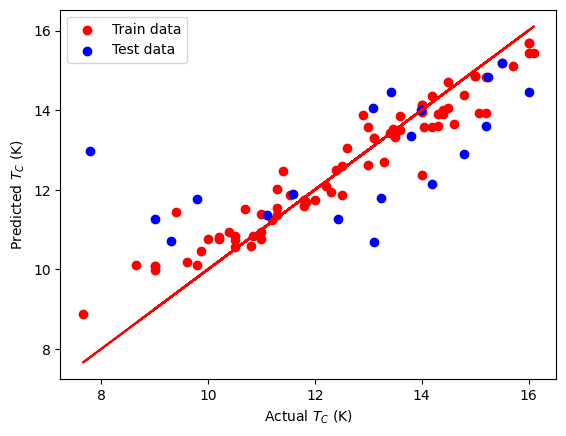

In [17]:
model_builder(rf)

The mean squared error (MSE) on test set: 1.3047
The root mean squared error (RMSE) on test set: 1.1423
The mean absolute error (MAE) on test set: 0.9373
r2 on train set: 0.9236
r2 on test set: 0.7606


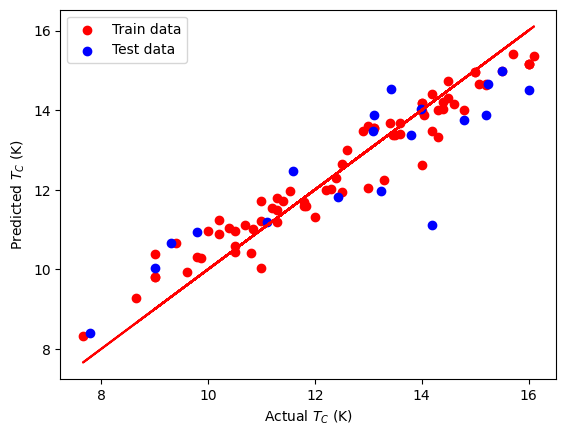

In [18]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 13,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(**params)
model_builder(gbr)

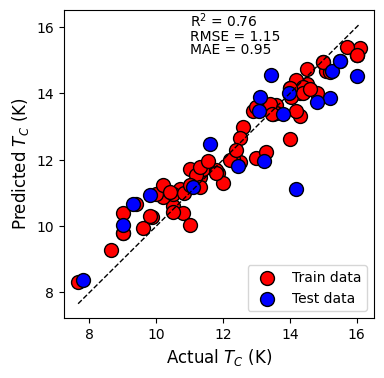

In [19]:
predicted_train = gbr.predict(X_train)
predicted_test = gbr.predict(X_test)

plt.style.use('default')
plt.figure(figsize=(4,4))
plt.scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
plt.scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)

plt.text(11,16, 'R$^{2}$ = 0.76', fontsize=10)
plt.text(11,15.6, 'RMSE = 1.15', fontsize=10)
plt.text(11,15.2, 'MAE = 0.95', fontsize=10)

plt.xlabel('Actual $T_{C}$ (K)', fontsize=12)
plt.ylabel('Predicted $T_{C}$ (K)', fontsize=12)
plt.legend(loc='lower right')
#plt.savefig(pwd + '/cross_validated_predictions.png', dpi=1000, bbox_inches="tight")
plt.show()

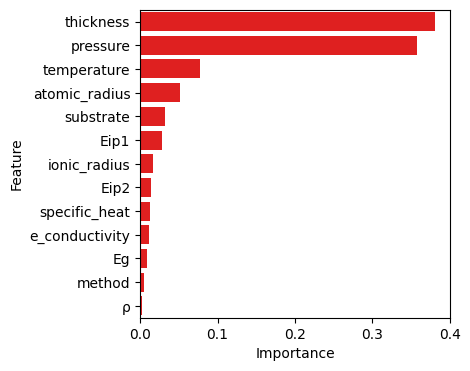

In [20]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = X_train.columns
feature_importance_df["Importance"] = gbr.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(4,4))
ax = sns.barplot(x ='Importance', y ='Feature', data= feature_importance_df, color='red')
#plt.savefig(pwd + '/feature_importance.png', dpi=1000, bbox_inches="tight")

In [21]:
feature_importance_df

,index,Feature,Importance
0,4,thickness,0.381573
1,3,pressure,0.357461
2,2,temperature,0.077069
3,7,atomic_radius,0.051887
4,1,substrate,0.032103
5,11,Eip1,0.028237
6,8,ionic_radius,0.017145
7,12,Eip2,0.014315
8,5,specific_heat,0.012950
9,6,e_conductivity,0.011854


c:\Users\Tohid\anaconda3\envs\regression\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
model_output = "margin" has been renamed to model_output = "raw"
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Explainer expected value: [12.54117011]


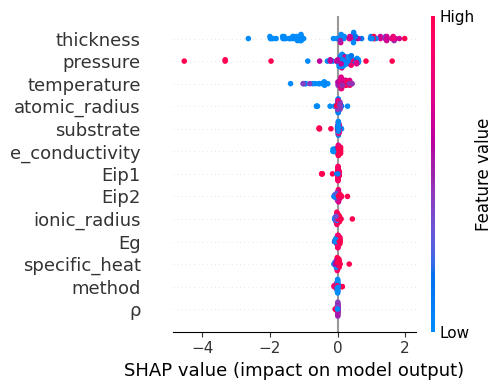

<Figure size 640x480 with 0 Axes>

In [22]:
import shap

# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(gbr, model_output='margin')
shap_values = explainer.shap_values(X_train)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")


# summarize the effects of all the features
plt.style.use('default')
plt.figure(figsize=(5,5))
shap.summary_plot(shap_values, X_train, max_display=13, plot_size=(5,4))
#plt.gcf().set_size_inches(5, 4.5)
#plt.gcf().set_font(10)
plt.tight_layout()
#plt.savefig(pwd + '/shap_values.png', dpi=1000, bbox_inches="tight")
plt.show()

In [23]:
"""import pickle

filename = 'GradientBoostingRegressor.sav'
pickle.dump(gbr, open(pwd + '/saved_models/' + filename, 'wb'))"""

"import pickle\n\nfilename = 'GradientBoostingRegressor.sav'\npickle.dump(gbr, open(pwd + '/saved_models/' + filename, 'wb'))"

In [24]:
predicted_Tc = gbr.predict(X)
predicted_Tc = pd.DataFrame(predicted_Tc, columns=['predicted_Tc'])

In [25]:
actual_prediction_df = pd.concat([raw_df, predicted_Tc], axis=1)
actual_prediction_df

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K,predicted_Tc
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,11.00,11.719476
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,11.30,11.187159
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,11.10,11.187159
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,14.30,13.998399
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.96200,1.026000,3.95,7.00,1018.800000,2759.480000,9.87,10.284515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,DcMs,GaAs,400.0,0.333306,4.5,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,9.30,10.665325
90,DcMs,GaAs,400.0,0.333306,5.6,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,10.40,11.031401
91,DcMs,GaAs,400.0,0.333306,10.0,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,12.50,12.640560
92,DcMs,GaAs,400.0,0.333306,140.0,0.350,0.0345,1.23500,0.710000,5.32,1.42,762.900000,1888.650000,14.60,14.144419


In [26]:
#actual_prediction_df.to_excel(pwd+'/actual_prediction_df.xlsx', index=False)

In [27]:
dal_df = pd.read_excel(pwd+'/exp_val_test_data.xlsx')
dal_df

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,actual_Tc,predicted_Tc,error
0,DcMs,MgF2,25.00,0.000000,5.000000,0.89,0.23,1.01,0.76,3.15,10.80,1366.569946,2732.899902,9.00,10.03,1.03
1,DcMs,Al2O3,750.00,0.500000,14.400000,0.91,0.15,0.96,1.03,3.95,7.00,1018.799988,2759.479980,15.25,14.66,0.59
2,DcMs,MgO,25.00,0.270000,144.800003,0.97,0.19,1.07,1.06,3.58,7.77,1025.349976,2419.350098,13.43,14.54,1.11
3,DcMs,MgO,25.00,0.250000,6.000000,0.97,0.19,1.07,1.06,3.58,7.77,1025.349976,2419.350098,9.80,10.95,1.15
4,DcMs,Si,26.85,0.330000,175.600006,0.71,0.00,1.17,0.54,2.33,1.12,786.500000,1577.099976,11.60,12.47,0.87
5,IBAS,Al2O3,200.00,5.000000,50.000000,0.91,0.15,0.96,1.03,3.95,7.00,1018.799988,2759.479980,15.20,13.87,1.33
6,IBAS,Si,800.00,25.000000,25.000000,0.71,0.00,1.17,0.54,2.33,1.12,786.500000,1577.099976,7.80,8.39,0.59
7,DcMs,Al2O3,750.00,0.500000,4.300000,0.91,0.15,0.96,1.03,3.95,7.00,1018.799988,2759.479980,12.44,11.82,0.62
8,IBAS,MgO,600.00,3.160000,100.000000,0.97,0.19,1.07,1.06,3.58,7.77,1025.349976,2419.350098,15.50,14.98,0.52
9,DcMs,GaAs,400.00,0.330000,4.500000,0.35,0.03,1.24,0.71,5.32,1.42,762.900024,1888.650024,9.30,10.67,1.37


In [28]:
pred_val = gbr.predict(X_test)

a = pd.DataFrame(
    {
        'actual_Tc': y_test,
        'predicted_Tc': pred_val
    }
)

val_dataset = pd.concat([X_test, a], axis=1)
print(val_dataset.shape, '\n')

val_dataset['error'] = abs(val_dataset.actual_Tc - val_dataset.predicted_Tc)
print(f'Maximum error on test data: {np.max(val_dataset.error):.3f}')

val_dataset['substrate'] = val_dataset['substrate'].replace([0, 1, 3, 4, 5, 6, 7, 2], ['Al2O3', 'GaAs', 'LiNbO3', 'MgF2', 'MgO', 'Si', 'SiN', 'HfO2'])
val_dataset['method'] = val_dataset['method'].replace([0, 2, 4, 3, 1], ['DcMs', 'IBAS', 'RfMs', 'PLD', 'IBAD'])

val_dataset2 = val_dataset[val_dataset['error'] >= 0.5]
val_dataset3 = val_dataset2[val_dataset2['error'] <= 2.0]
val_dataset3=val_dataset3.round(decimals=2)
#val_dataset3.to_excel(pwd+'/exp_val_test_data.xlsx', index=False)
val_dataset3 = val_dataset3.sort_values(by=['actual_Tc']).reset_index(drop=True)
val_dataset3

(19, 15) 

Maximum error on test data: 3.082


,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,actual_Tc,predicted_Tc,error
0,IBAS,Si,800.00,25.000000,25.000000,0.71,0.00,1.17,0.54,2.33,1.12,786.500000,1577.099976,7.80,8.39,0.59
1,DcMs,MgF2,25.00,0.000000,5.000000,0.89,0.23,1.01,0.76,3.15,10.80,1366.569946,2732.899902,9.00,10.04,1.04
2,DcMs,GaAs,400.00,0.330000,4.500000,0.35,0.03,1.24,0.71,5.32,1.42,762.900024,1888.650024,9.30,10.67,1.37
3,DcMs,MgO,25.00,0.250000,6.000000,0.97,0.19,1.07,1.06,3.58,7.77,1025.349976,2419.350098,9.80,10.95,1.15
4,DcMs,Si,26.85,0.330000,175.600006,0.71,0.00,1.17,0.54,2.33,1.12,786.500000,1577.099976,11.60,12.47,0.87
5,DcMs,Al2O3,750.00,0.500000,4.300000,0.91,0.15,0.96,1.03,3.95,7.00,1018.799988,2759.479980,12.44,11.82,0.62
6,DcMs,HfO2,300.00,53.330002,264.000000,0.66,0.01,0.95,1.12,9.68,5.70,1094.829956,2738.669922,13.10,13.89,0.79
7,DcMs,Al2O3,750.00,0.500000,5.100000,0.91,0.15,0.96,1.03,3.95,7.00,1018.799988,2759.479980,13.23,11.96,1.27
8,DcMs,MgO,25.00,0.270000,144.800003,0.97,0.19,1.07,1.06,3.58,7.77,1025.349976,2419.350098,13.43,14.54,1.11
9,DcMs,Si,600.00,0.100000,50.000000,0.71,0.00,1.17,0.54,2.33,1.12,786.500000,1577.099976,14.80,13.75,1.05


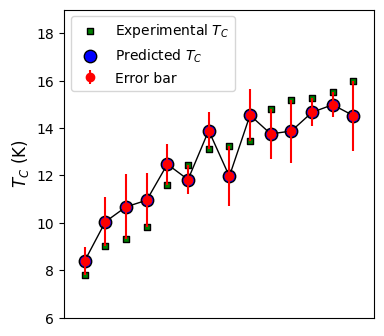

In [29]:
x = np.arange(1, val_dataset3.shape[0] + 1 , 1)

plt.figure(figsize=(4,4))
plt.plot(x, val_dataset3.predicted_Tc, c='k', lw=1)
plt.errorbar(x=x, y= val_dataset3.predicted_Tc, yerr = val_dataset3.error, fmt ='o', c='r', label='Error bar')
plt.scatter(x, val_dataset3.actual_Tc, s=20, c='g', label='Experimental $T_{C}$', edgecolors=(0, 0, 0), marker='s')
plt.scatter(x, val_dataset3.predicted_Tc, s=80, c='b', label='Predicted $T_{C}$', edgecolors=(0, 0, 0))


"""# add annotations one by one with a loop
for i in range(0, val_dataset3.shape[0]):
     if (i%2) == 0:
          plt.text(x[i]-0.8, 6, f'{val_dataset3.error[i]}', horizontalalignment='left')
          #plt.text(x[i]-0.8, val_dataset3.predicted_Tc[i]-2.0, f'{val_dataset3.error[i]}', horizontalalignment='left')
     else:
          plt.text(x[i]-0.8, 16, f'{val_dataset3.error[i]}', horizontalalignment='left')
          #plt.text(x[i]-0.8, val_dataset3.predicted_Tc[i]+2.0, f'{val_dataset3.error[i]}', horizontalalignment='left')"""


plt.xlim(x[0]-1, x[-1]+1.0)
plt.ylim(6,19)

plt.tick_params(bottom = False, labelbottom = False)
plt.ylabel('$T_{C}$ (K)', fontsize=12)
plt.legend()
#plt.savefig(pwd + '/ErrorBar_plot2.png', dpi=1000, bbox_inches="tight")
plt.show()

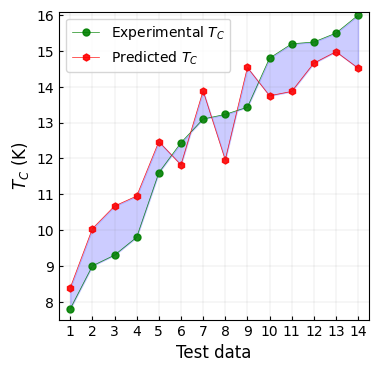

In [44]:
x = np.arange(1, val_dataset3.shape[0] + 1 , 1)

plt.figure(figsize=(4,4))
#plt.plot(x, val_dataset3.predicted_Tc, c='b', lw=0.5)
#plt.errorbar(x=x, y= val_dataset3.predicted_Tc, yerr = val_dataset3.error, fmt ='o', c='r', label='Error bar')
plt.plot(x, val_dataset3.actual_Tc, c='g', label='Experimental $T_{C}$', marker='o',  markersize=5, lw=0.5, alpha=0.9)
plt.plot(x, val_dataset3.predicted_Tc, marker='h', c='r', label='Predicted $T_{C}$',  markersize=5, lw=0.5, alpha=0.9)
#plt.plot(x, val_dataset3.actual_Tc, c='k', lw=0.5)
#plt.plot([val_dataset3.actual_Tc.min(), val_dataset3.actual_Tc.max()], [val_dataset3.actual_Tc.min(), val_dataset3.actual_Tc.max()], 'k--', lw=1)


"""# add annotations one by one with a loop
for i in range(0, val_dataset3.shape[0]):
     if (i%2) == 0:
          plt.text(x[i]-0.8, 6, f'{val_dataset3.error[i]}', horizontalalignment='left')
          #plt.text(x[i]-0.8, val_dataset3.predicted_Tc[i]-2.0, f'{val_dataset3.error[i]}', horizontalalignment='left')
     else:
          plt.text(x[i]-0.8, 16, f'{val_dataset3.error[i]}', horizontalalignment='left')
          #plt.text(x[i]-0.8, val_dataset3.predicted_Tc[i]+2.0, f'{val_dataset3.error[i]}', horizontalalignment='left')"""


plt.xlim(x[0]-0.5, x[-1]+0.5)
plt.ylim(7.5, 16.1)

"""for i,j,k,l in zip(x, val_dataset3.actual_Tc, val_dataset3.predicted_Tc, val_dataset3.error):
     plt.plot([i,i], [j,k], c='r', lw=1)"""

y1 = np.arange(7,16.5,1)
for i in x:
     plt.axvline(x=i, lw=0.1, c='gray')
     #plt.axhline(y=j, lw=0.1, c='gray')
for j in y1:
     plt.axhline(y=j, lw=0.1, c='gray')


plt.fill_between(x, val_dataset3.predicted_Tc, val_dataset3.actual_Tc, color='b', alpha=0.2)


plt.tick_params(bottom = True, labelbottom = True)
plt.tick_params(direction='in', which='minor', length=3, bottom=True, top=False, left=True, right=False)
plt.tick_params(direction='in', which='major', length=3, bottom=True, top=False, left=True, right=False)
xticks = x
plt.xticks(xticks)

plt.xlabel('Test data', fontsize=12)
plt.ylabel('$T_{C}$ (K)', fontsize=12)
plt.legend()
#plt.savefig(pwd + '/ErrorBar_plot2.png', dpi=1000, bbox_inches="tight")
plt.show()